In [6]:
import sys
sys.path.append("/home/huaqingj/MyResearch/TVDN")

In [25]:
from pyTVDN import TVDNDetect, TVDNRankTuning
from pathlib import Path
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
resDir = Path("../results")
dataDir = Path("../data")

In [9]:
filname = Path("subj1.mat")
MEG = loadmat(dataDir/filname)["DK_timecourse"]

## Tuning the rank

In [102]:
ranks = [2, 4, 6, 8, 10]
kappas = np.arange(1.0, 3, step=0.01)

In [103]:
res = TVDNRankTuning(ranks, kappas, Ymat=MEG, dataType="MEG", saveDir="../results", fName="subj1")

The current rank is 2.
The parameters for detection are:
{'Lmin': 60,
 'MaxM': 19,
 'T': 2,
 'decimateRate': 10,
 'downRate': 20,
 'fName': 'subj1',
 'fct': 0.5,
 'freq': 60,
 'is_detrend': False,
 'kappa': 1.0,
 'lamb': 0.0001,
 'plotfct': 30,
 'r': 2}
The current rank is 4.
The parameters for detection are:
{'Lmin': 60,
 'MaxM': 19,
 'T': 2,
 'decimateRate': 10,
 'downRate': 20,
 'fName': 'subj1',
 'fct': 0.5,
 'freq': 60,
 'is_detrend': False,
 'kappa': 1.0,
 'lamb': 0.0001,
 'plotfct': 30,
 'r': 4}
The current rank is 6.
The parameters for detection are:
{'Lmin': 60,
 'MaxM': 19,
 'T': 2,
 'decimateRate': 10,
 'downRate': 20,
 'fName': 'subj1',
 'fct': 0.5,
 'freq': 60,
 'is_detrend': False,
 'kappa': 1.0,
 'lamb': 0.0001,
 'plotfct': 30,
 'r': 6}
The current rank is 8.
The parameters for detection are:
{'Lmin': 60,
 'MaxM': 19,
 'T': 2,
 'decimateRate': 10,
 'downRate': 20,
 'fName': 'subj1',
 'fct': 0.5,
 'freq': 60,
 'is_detrend': False,
 'kappa': 1.0,
 'lamb': 0.0001,
 'plotfct

In [104]:
MSEs = np.array(res.DetectObj.MSEs)
numchgs = np.array(res.DetectObj.numchgs)

In [105]:
print(res)

{'minErr': 0.4819443188361585, 'optRank': 6, 'optKappa': array([2.57, 2.58]), 'DetectObj': <pyTVDN.TVDNclass.TVDNDetect object at 0x7fd28180bf28>}


Text(0.5, 0, 'kappa')

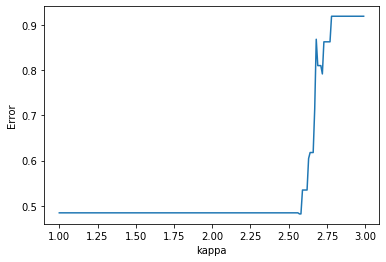

In [107]:
plt.plot(kappas, MSEs[numchgs])
plt.ylabel("Error")
plt.xlabel("kappa")

In [73]:
print(res.DetectObj)

+-------------+--------------------------------------------------------------------------+--------------------+------+
| Num of CPTs |                              Estiamted CPTs                              |        MSE         | Rank |
+-------------+--------------------------------------------------------------------------+--------------------+------+
|      18     | [ 161.  387.  617.  768.  998. 1108. 1293. 1527. 1647. 1843. 2044. 2206. | 0.4819443188361585 |  6   |
|             |                   2328. 2508. 2760. 3123. 3218. 3385.]                   |                    |      |
+-------------+--------------------------------------------------------------------------+--------------------+------+


## Construct the TVDN Detection Class


- `saveDir` is the path to save the results, if upspecified, the results will not be saved.

- You can also specify the detection parameters manunally

In [74]:
MEGdet = TVDNDetect(Ymat=MEG, saveDir="../results", dataType="MEG", fName="subj1", r=6, kappa=2.65, freq=60)

The parameters for detection are:
{'Lmin': 60,
 'MaxM': 19,
 'T': 2,
 'decimateRate': 10,
 'downRate': 20,
 'fName': 'subj1',
 'fct': 0.5,
 'freq': 60,
 'is_detrend': False,
 'kappa': 2.65,
 'lamb': 0.0001,
 'plotfct': 30,
 'r': 6}


## Run the Main Function

In [75]:
MEGdet()

### Check the current results

In [76]:
print(MEGdet)

+-------------+----------------------------------------------------------+--------------------+------+
| Num of CPTs |                      Estiamted CPTs                      |        MSE         | Rank |
+-------------+----------------------------------------------------------+--------------------+------+
|      11     | [ 161  387  617 1013 1204 1550 1964 2179 2439 3212 3382] | 0.6178042433874334 |  6   |
+-------------+----------------------------------------------------------+--------------------+------+


## Tuning the kappa parameters

In [92]:
kappas = np.arange(2.00, 3, 0.01)
#kappas = np.linspace(2.63,3.05, 7)
MEGdet.TuningKappa(kappas)

### Then we  can check the best kappa parameters w.r.t mean square errors

In [93]:
print("The optimal kappas are:", MEGdet.optKappa)
print("The optimal number of change point under the range of kappa we speicified is:", MEGdet.optKappaOptNumChg)
print("The optimal number of change point is:", MEGdet.optNumChg)

The optimal kappas are: 2.569999999999988
The optimal number of change point under the range of kappa we speicified is: 18
The optimal number of change point is: 16


###  Update the estimated change point set based on optimal kappa

You can also specify the number of change points you want via providing the augment `numChg`, then the `UpdateEcpts` will update the current estimated change point set accordingly.

In such case, the `PlotXXX` function will plot the curves under the number of change point you provided

In [94]:
MEGdet.UpdateEcpts(numChg=16)
MEGdet.UpdateEcpts()

### Check the results after updating

In [95]:
print(MEGdet)

+-------------+--------------------------------------------------------------------------+--------------------+------+
| Num of CPTs |                              Estiamted CPTs                              |        MSE         | Rank |
+-------------+--------------------------------------------------------------------------+--------------------+------+
|      18     | [ 161.  387.  617.  768.  998. 1108. 1293. 1527. 1647. 1843. 2044. 2206. | 0.4819443188361585 |  6   |
|             |                   2328. 2508. 2760. 3123. 3218. 3385.]                   |                    |      |
+-------------+--------------------------------------------------------------------------+--------------------+------+


### Plot the detection results under the optimal kappa

 You may also specify the `saveFigPath` to save the figure


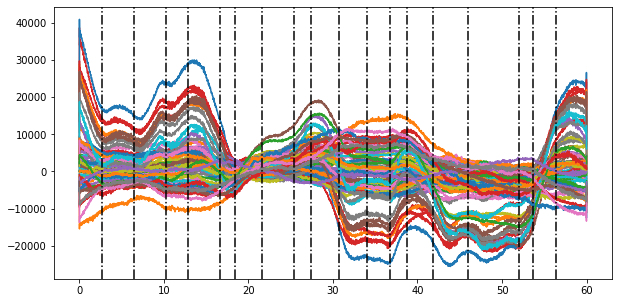

In [96]:
MEGdet.PlotEcpts(saveFigPath=None)

### Plot the reconstructed curve under the optimal kappa

 Similarly, you can specify the `saveFigPath` to save the figure
 
 You should specify the subsets of sequences you want to plot via `idxs` argument

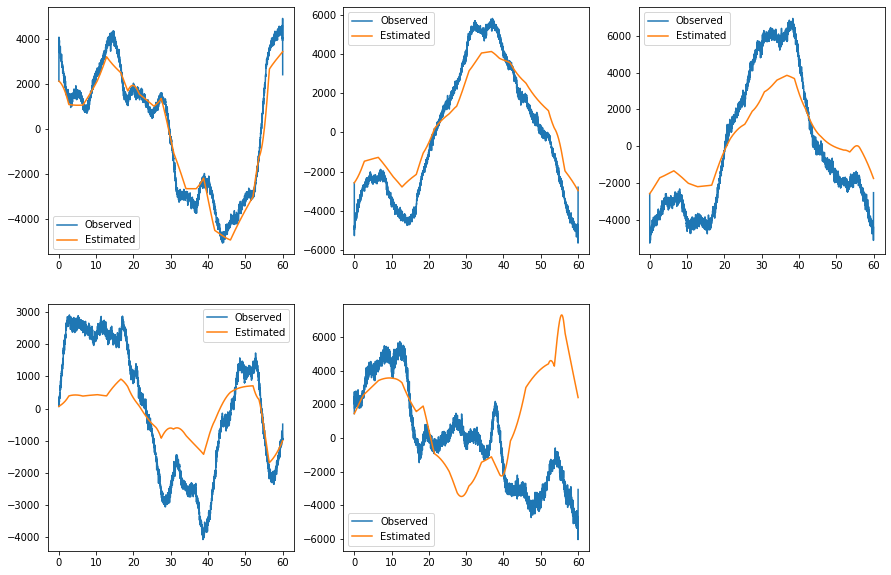

In [97]:
MEGdet.PlotRecCurve(saveFigPath=None)

### Plot the eigenvalue curve under the optimal kappa

 Similarly, you can specify the `saveFigPath` to save the figure

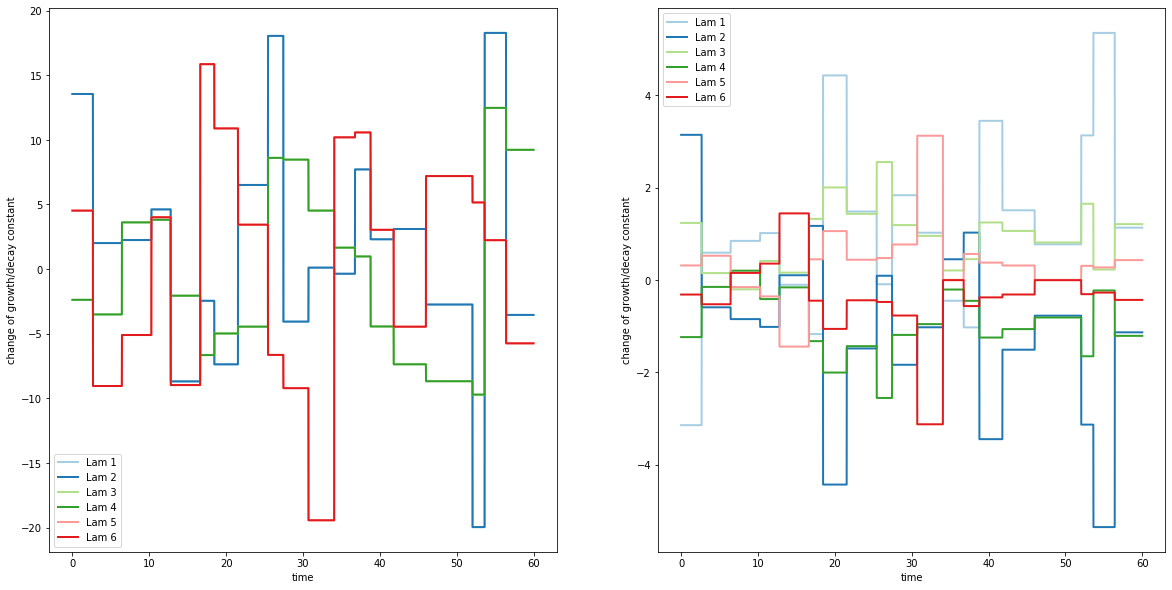

In [98]:
MEGdet.PlotEigenCurve()

### Results when number of changes is 0

In [99]:
MEGdet.UpdateEcpts(numChg=0)

In [100]:
print(MEGdet)

+-------------+----------------+--------------------+------+
| Num of CPTs | Estiamted CPTs |        MSE         | Rank |
+-------------+----------------+--------------------+------+
|      0      |       []       | 0.9194445561814828 |  6   |
+-------------+----------------+--------------------+------+


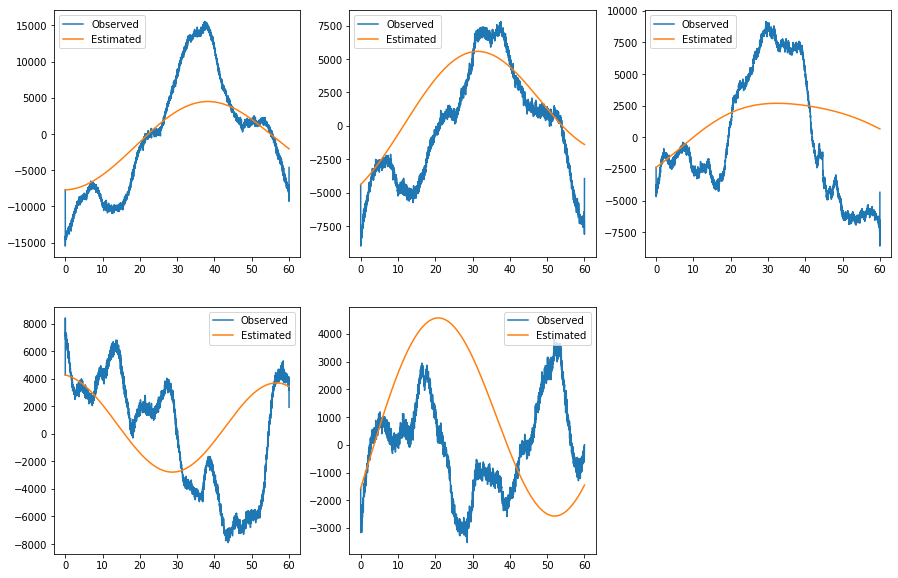

In [101]:
MEGdet.PlotRecCurve(saveFigPath=None)